In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/fashion_products.csv")
df.head(20)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [4]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


Text(0.5, 1.0, 'Price Distribution')

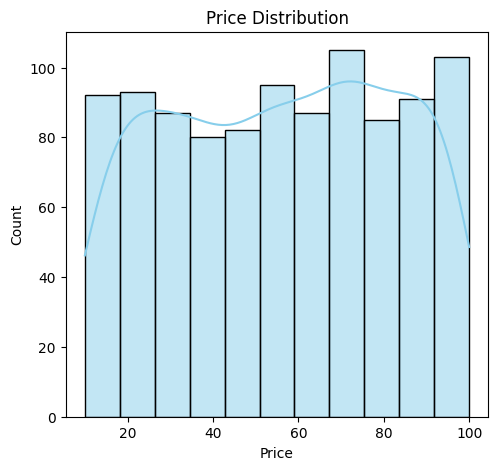

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of price and rating
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Price'],kde=True,color='skyblue')
plt.title('Price Distribution')

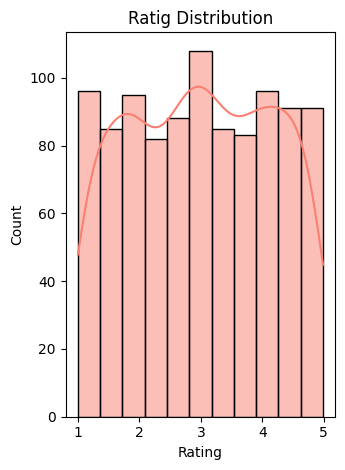

In [6]:
plt.subplot(1,2,2)
sns.histplot(df['Rating'],kde=True,color='salmon')
plt.title('Ratig Distribution')
plt.tight_layout()
plt.show()

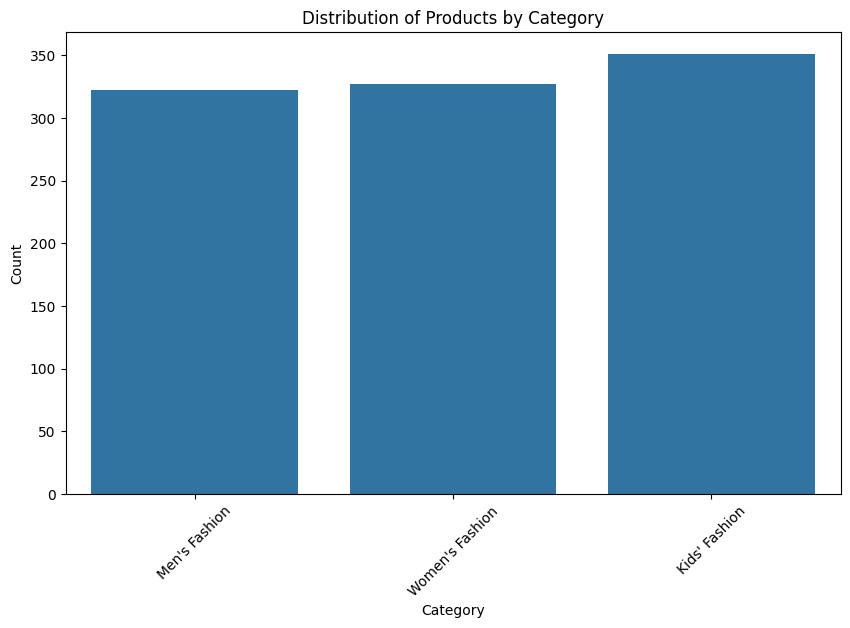

In [7]:
#Category-wise Analysis
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Category')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

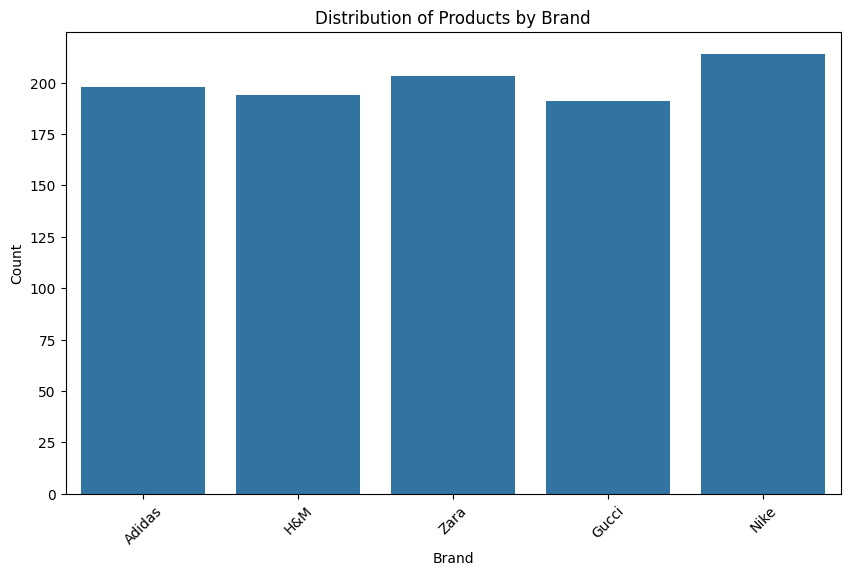

In [9]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand')
plt.title('Distribution of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

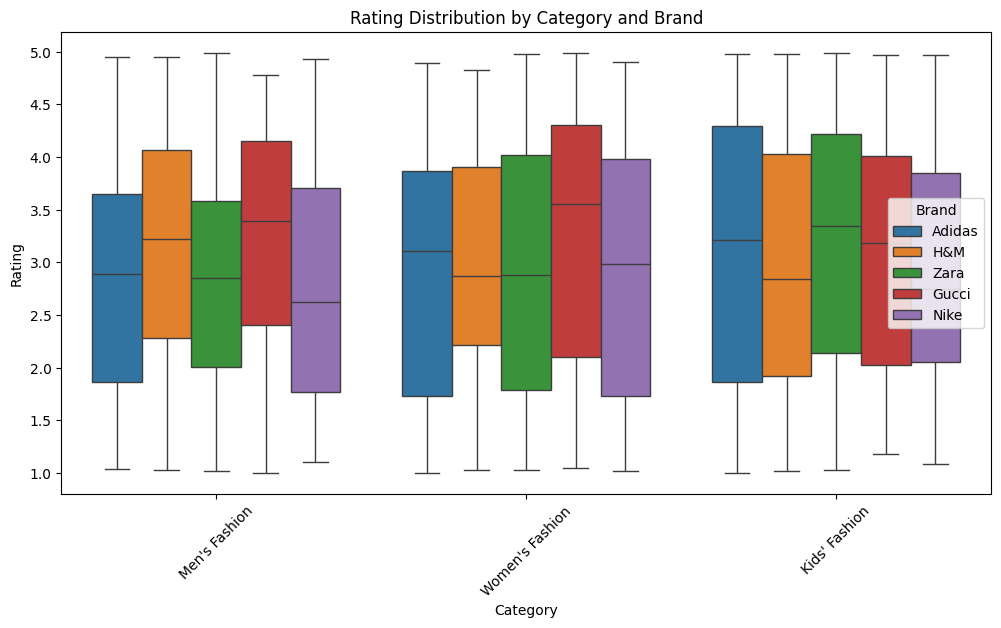

In [10]:
# Rating Distribution by Category and Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Rating', hue='Brand')
plt.title('Rating Distribution by Category and Brand')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

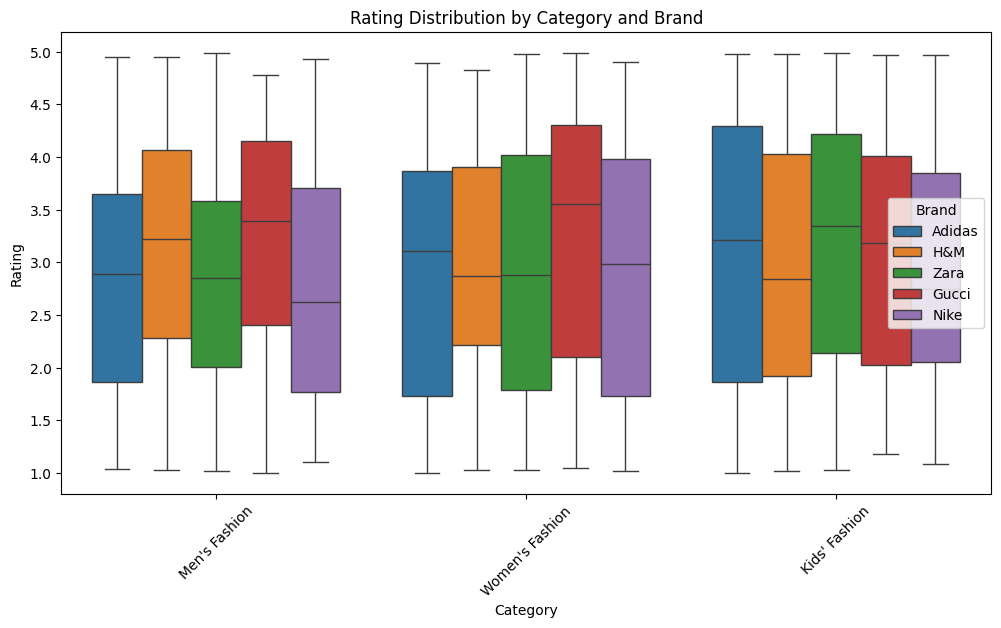

In [11]:
# Rating Distribution by Category and Brand
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Rating', hue='Brand')
plt.title('Rating Distribution by Category and Brand')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

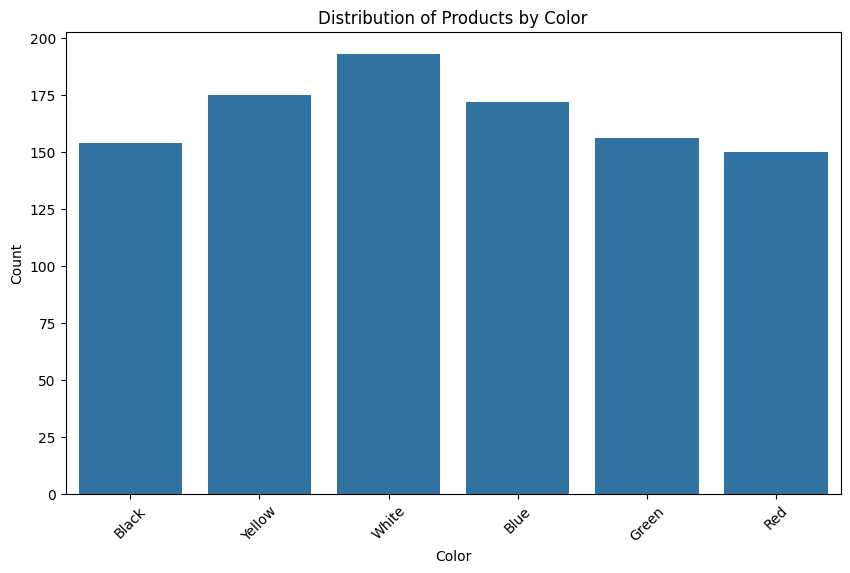

In [12]:
# Color Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color')
plt.title('Distribution of Products by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

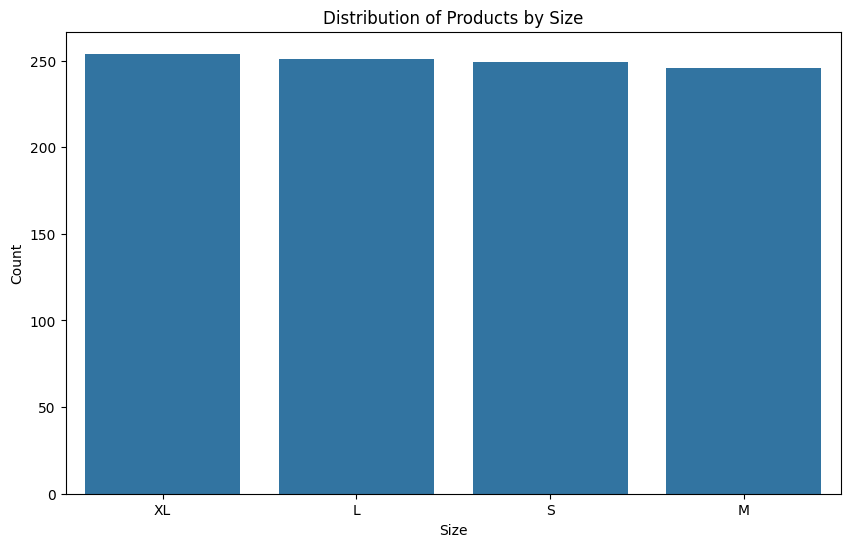

In [13]:
# Size Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Size')
plt.title('Distribution of Products by Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

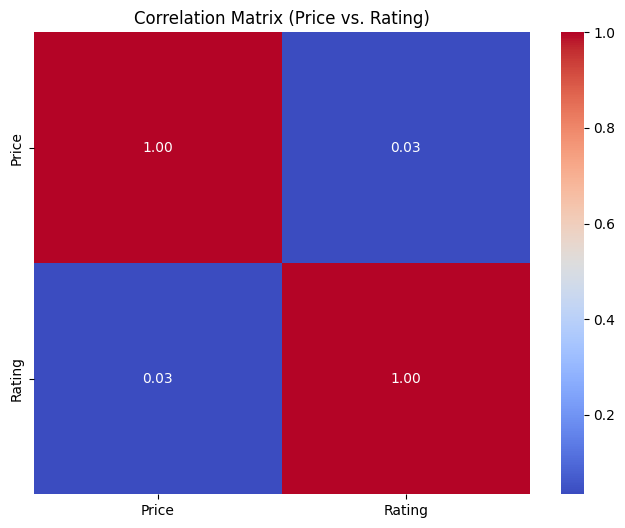

In [14]:
# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Rating']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Price vs. Rating)')
plt.show()

In [15]:
# Top Selling Products
top_products = df['Product Name'].value_counts().head(5)
print("Top Selling Products:\n", top_products)

Top Selling Products:
 Product Name
Jeans      231
Shoes      222
T-shirt    201
Dress      176
Sweater    170
Name: count, dtype: int64


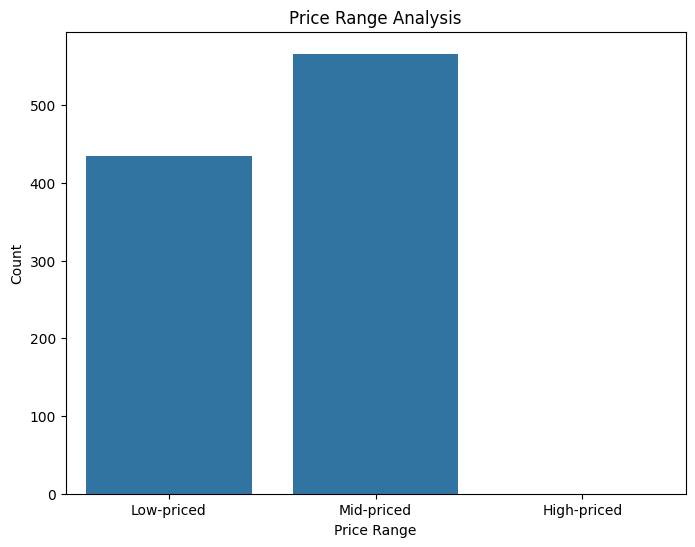

In [16]:
# Price Range Analysis
price_bins = [0, 50, 100, 150]
price_labels = ['Low-priced', 'Mid-priced', 'High-priced']
df['Price Range'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Price Range')
plt.title('Price Range Analysis')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

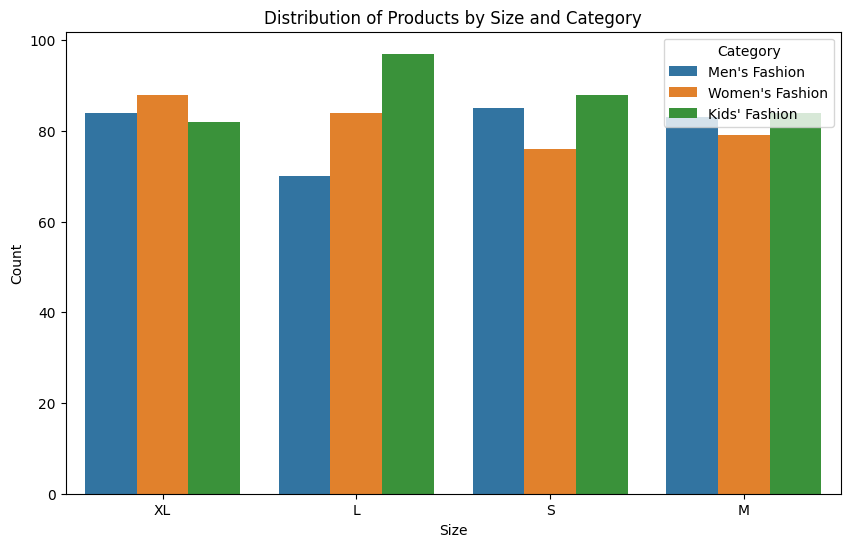

In [17]:
# Size-wise Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Size', hue='Category')
plt.title('Distribution of Products by Size and Category')
plt.xlabel('Size')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
#Step 1:Outlier Removal
#Lets use IQR method to remove outliers
Q1=df['Rating'].quantile(0.25)
Q3=df['Rating'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
# Step 2: Feature Engineering
# Define features and target
X = df.drop(columns=['User ID', 'Product ID', 'Product Name', 'Rating'])
y = df['Rating']
# Perform one-hot encoding for categorical variables
categorical_features = ['Brand', 'Category', 'Color', 'Size']
numeric_features = ['Price']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])
#Step 3:Model Training
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Price']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Brand', 'Category', 'Color',
                                                   'Size'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
# Step 4: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.7167820355163053
R-squared: -0.19205893348872216


In [21]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
# Perform Grid Search Cross Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         ['Price']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Brand',
                                                                          'Category',
                                                                          'Color',
                                                                          'Size'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [22]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}


In [23]:
# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (after hyperparameter tuning):", mse)
print("R-squared (after hyperparameter tuning):", r2)

Mean Squared Error (after hyperparameter tuning): 1.5570014740670854
R-squared (after hyperparameter tuning): -0.08111424643291598
